<a href="https://colab.research.google.com/github/FLafage/Cours_Python/blob/main/Naissance_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercice sur la table des naissances journalières en 2024**



## **Upload de Google Drive :**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import et chargement des données :**

In [ ]:
import pandas as pd
import geopandas as gpd

naissance_24 = pd.read_parquet('/content/drive/MyDrive/Cours_python/FD_NAIS_2024.parquet')

naissance_24


,ANAIS,MNAIS,DEPNAIS,REGNAIS,SEXE,NBENF,AGEMERE,AGEXACTM,INDLNM,INDNATM,GAGPOM,GAGEXAPOM,DEPDOMM,REGDOMM
0,2024,01,69,84,2,1,26,25,1,1,40,35,01,84
1,2024,03,01,84,1,1,36,35,1,1,40,35,01,84
2,2024,04,69,84,2,1,28,27,1,1,25,25,01,84
3,2024,04,01,84,2,1,35,34,1,1,35,35,01,84
4,2024,04,69,84,2,1,33,32,1,1,35,35,01,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660782,2024,12,67,44,2,1,31,31,3,2,30,30,99,99
660783,2024,08,973,03,1,1,17,17,3,2,20,20,99,99
660784,2024,02,95,11,1,1,32,31,3,2,35,35,99,99
660785,2024,04,06,93,2,1,43,43,3,2,45,40,99,99


## **Type des variables :**

In [ ]:
naissance_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660787 entries, 0 to 660786
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ANAIS      660787 non-null  object
 1   MNAIS      660787 non-null  object
 2   DEPNAIS    660787 non-null  object
 3   REGNAIS    660787 non-null  object
 4   SEXE       660787 non-null  object
 5   NBENF      660787 non-null  object
 6   AGEMERE    660787 non-null  object
 7   AGEXACTM   660787 non-null  object
 8   INDLNM     660787 non-null  object
 9   INDNATM    660787 non-null  object
 10  GAGPOM     660787 non-null  object
 11  GAGEXAPOM  660787 non-null  object
 12  DEPDOMM    660787 non-null  object
 13  REGDOMM    660787 non-null  object
dtypes: object(14)
memory usage: 70.6+ MB


## **Transformation des variables souhaitée en numérique :**

In [ ]:
naissance_24['NBENF'] = pd.to_numeric(naissance_24['NBENF'], errors='coerce')

naissance_24['AGEMERE'] = pd.to_numeric(naissance_24['AGEMERE'], errors='coerce')

naissance_24['MNAIS'] = pd.to_numeric(naissance_24['MNAIS'], errors='coerce')

## **Devoirs de François :**

Quel est le jour et le mois de l'année pour lequels le nombre de naissance est le plus élevé, pour l'ensemble de la France ?

In [ ]:
j_m_naissances = (naissance_24
    .groupby(['MNAIS'], as_index = False)
    .agg(total_enfants=('NBENF', 'sum'))
    .sort_values('total_enfants', ascending=False)
)

j_m_naissances

# Le mois avec le plus de naissance est le mois de Juillet avec 59390 naissances

,MNAIS,total_enfants
6,7,59390
9,10,58995
7,8,58501
4,5,58309
0,1,58006
8,9,56922
2,3,56454
11,12,55713
10,11,55050
3,4,54888


Est-ce que par département, il s'agit du même mois ?

In [ ]:
dep_m_naissances = (naissance_24
    .groupby(['DEPNAIS', 'MNAIS'], as_index = False)
    .agg(total_enfants=('NBENF', 'sum'))
    .sort_values(['DEPNAIS', 'total_enfants'], ascending=[True, False])
    .drop_duplicates(subset=['DEPNAIS'])
    .query('MNAIS == 7')
)

dep_m_naissances

,DEPNAIS,MNAIS,total_enfants
18,02,7,391
234,21,7,480
246,22,7,344
318,28,7,323
330,29,7,657
342,2A,7,117
366,30,7,543
474,39,7,156
510,42,7,756
594,49,7,838


Quel est la part de naissances gémellaires par département ?

In [ ]:
# On crée d'abord la colonne sur le dataframe existant
naissance_24['jumeaux'] = (naissance_24.NBENF == 2)

# On fait l'agrégation
part_jumeaux_dep = (naissance_24
    .groupby(['DEPNAIS'], as_index = False)
    .agg(
        nb_jumeaux = ('jumeaux', 'mean')
    )
)

part_jumeaux_dep

,DEPNAIS,nb_jumeaux
0,01,0.021809
1,02,0.027384
2,03,0.020513
3,04,0.011148
4,05,0.015025
...,...,...
96,971,0.036494
97,972,0.038343
98,973,0.031660
99,974,0.032967


Quel est l'âge médian des mères ?

In [ ]:
age_mere = (naissance_24['AGEMERE']
            .median())

age_mere

# L'âge médian des mères à l'échelle nationale est de 31 an.

31.0

In [ ]:
naissance_24.AGEMERE = naissance_24.AGEMERE.astype(float)

In [ ]:
age_daronne = (naissance_24
          .groupby(['DEPNAIS'], as_index = False)
          .agg(
              age_mere = ('AGEMERE', 'median'),
              age_quartile = ('AGEMERE', lambda x: x.quantile(0.25)))
)

age_daronne

# L'âge médian des mères par département.

,DEPNAIS,age_mere,age_quartile
0,01,31.0,27.0
1,02,30.0,25.0
2,03,30.0,26.0
3,04,31.0,27.0
4,05,32.0,28.0
...,...,...,...
96,971,31.0,26.0
97,972,32.0,26.0
98,973,28.0,23.0
99,974,30.0,25.0


## **Cartographie de l'âge médian des mères par département :**

In [ ]:
carte = gpd.read_file('/content/drive/MyDrive/Cours_python/dep_francemetro_2025.gpkg')

carte_age_med = pd.merge(carte, age_daronne, how='left', left_on='code', right_on='DEPNAIS')


<Axes: >

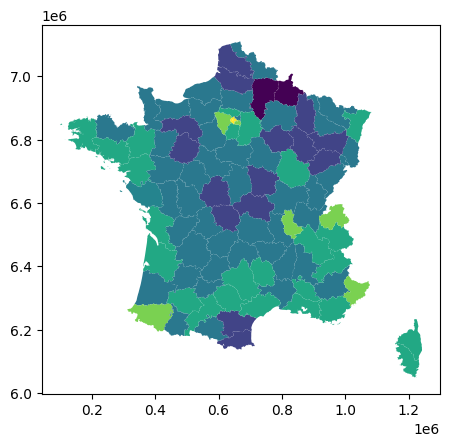

In [ ]:
carte_age_med.plot('age_quartile')